In [1]:
import pandas as pd
import os.path as op
from neural_priors.utils.data import get_all_subject_ids


subjects = ['17']
gaussian = True
smoothed = True

In [2]:
def load_fisher_information(subject, gaussian, smoothed, bids_folder='/data/ds-neuralpriors'):
    key = 'fisher_information'

    if gaussian:
        key += '.gaussian'

    if smoothed:
        key+= '.smoothed'

    target_dir = op.join(bids_folder, 'derivatives', key, f'sub-{subject}', 'func')

    conditions = ['narrow', 'wide']
    
    fisher_information = [pd.read_csv(op.join(target_dir, f'sub-{subject}_range-{condition}_fisher_information.tsv'),  index_col=0, sep='\t') for condition in conditions]
    fisher_information = pd.concat(fisher_information, keys=conditions, names=['condition'])

    return fisher_information


In [3]:
fisher_information = []
keys = []
for subject in get_all_subject_ids():

    try:
        fisher_information.append(load_fisher_information(subject, gaussian, smoothed))
        keys.append(subject)
    except FileNotFoundError:
        continue

fisher_information = pd.concat(fisher_information, keys=keys, names=['subject'])

In [9]:
import numpy as np
# fisher_information.xs(tuple(np.arange(10, 41)), level='stimulus')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index_class_helper.pxi", line 19, in pandas._libs.index.Float64Engine._check_type
KeyError: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40)

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_59104/133046627.py", line 2, in <module>
    fisher_information.xs(tuple(np.ar

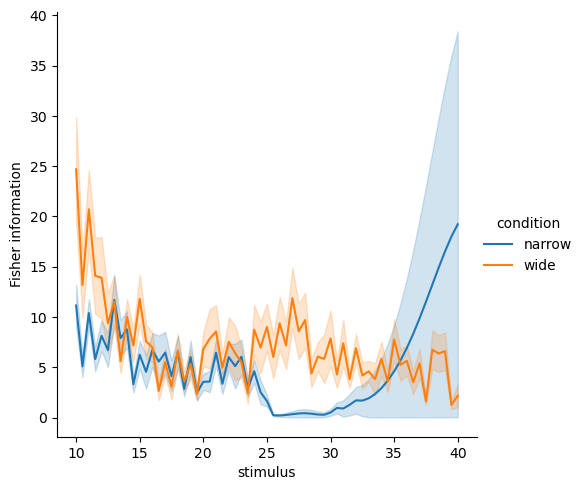

In [4]:
import seaborn as sns

sns.relplot(x='stimulus', y='Fisher information', hue='condition', kind='line', data=fisher_information.reset_index(), errorbar='se')

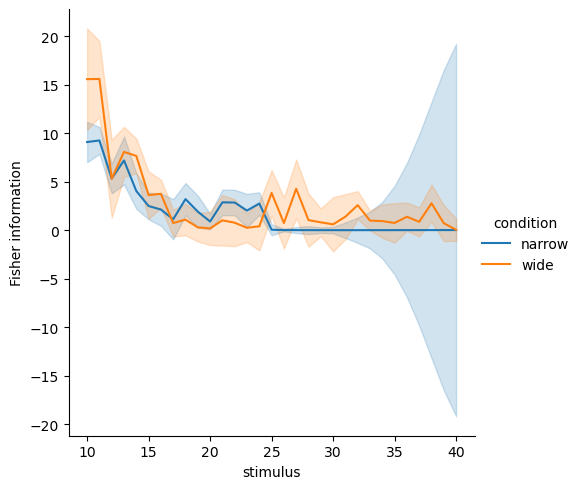

In [15]:
tmp = fisher_information.loc[(slice(None), slice(None), list(range(10, 41))), :]
sns.relplot(x='stimulus', y='Fisher information', hue='condition', kind='line', data=tmp.reset_index(), errorbar='se',
            estimator='median')